# Face Detection

In [12]:
#Importando as bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
#%matplotlib inline

DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w10 - Deep Learning\data"
MODEL_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w10 - Deep Learning\models"

In [13]:
DNN = "TF"
if DNN == "CAFFE":
    modelFile = MODEL_PATH + "/res10_300x300_ssd_iter_140000_fp16.caffemodel"
    configFile = MODEL_PATH + "/deploy.prototxt"
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
else:
    modelFile = MODEL_PATH + "/opencv_face_detector_uint8.pb"
    configFile = MODEL_PATH + "/opencv_face_detector.pbtxt"
    net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

In [14]:
def detectFaceOpenCVDnn(net, frame):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], False, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv2.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

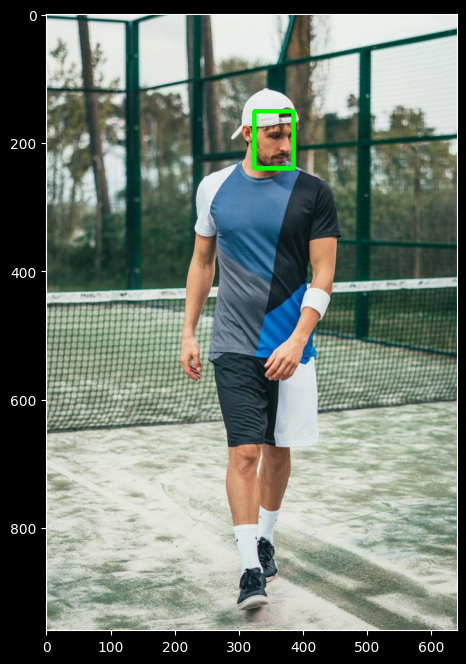

In [17]:
conf_threshold = 0.6

im = cv2.imread(DATA_PATH + '/images/man.jpg')
output,bboxes = detectFaceOpenCVDnn(net, im)
plt.imshow(output[:,:,::-1]);

https://www.learnopencv.com/face-detection-opencv-dlib-and-deep-learning-c-python/
https://towardsdatascience.com/extracting-faces-using-opencv-face-detection-neural-network-475c5cd0c260
https://en.wikipedia.org/wiki/Face_detection